### **Name :** Anuganti Suresh

### **Project :** HandWritten Digit Classifier

----------------

#### **Data Description**

- The data files **train.csv** contain **gray-scale images** of hand-drawn digits, from zero through nine.

- Each image is **28 pixels in height and 28 pixels in width**, for a total of **784 pixels** in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This **pixel-value** is an integer **between 0 and 255**, inclusive.

- The training data set, (train.csv), has **785 columns**.

 - The **first column**, called **"label"**, is the **digit** that was **drawn by the user**.
 
 - The **rest of the columns** contain the **pixel-values** of the associated image.

- Each pixel column in the training set has a name like **pixelx**, where **x** is an integer **between 0 and 783**, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

- For example, **pixel31** indicates the pixel that is in the **fourth column from the left**, and the **second row from the top**, as in the ascii-diagram below.

- Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

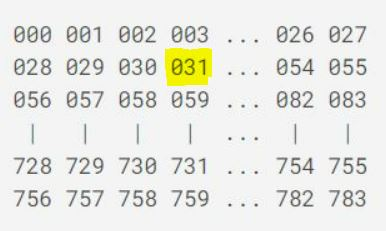

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
pd.options.display.max_info_columns = 800

In [ ]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [ ]:
def knn(x, y, queryPoint, k=5):
    vals = []
    m = x.shape[0]
    for i in range(m):
        d = dist(queryPoint, x[i])
        vals.append((d, y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:, 1], return_counts = True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/5_UAcelt/Hand-written-digit.zip')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

#### **EDA**

In [ ]:
print(df.columns.values)

['label' 'pixel0' 'pixel1' 'pixel2' 'pixel3' 'pixel4' 'pixel5' 'pixel6'
 'pixel7' 'pixel8' 'pixel9' 'pixel10' 'pixel11' 'pixel12' 'pixel13'
 'pixel14' 'pixel15' 'pixel16' 'pixel17' 'pixel18' 'pixel19' 'pixel20'
 'pixel21' 'pixel22' 'pixel23' 'pixel24' 'pixel25' 'pixel26' 'pixel27'
 'pixel28' 'pixel29' 'pixel30' 'pixel31' 'pixel32' 'pixel33' 'pixel34'
 'pixel35' 'pixel36' 'pixel37' 'pixel38' 'pixel39' 'pixel40' 'pixel41'
 'pixel42' 'pixel43' 'pixel44' 'pixel45' 'pixel46' 'pixel47' 'pixel48'
 'pixel49' 'pixel50' 'pixel51' 'pixel52' 'pixel53' 'pixel54' 'pixel55'
 'pixel56' 'pixel57' 'pixel58' 'pixel59' 'pixel60' 'pixel61' 'pixel62'
 'pixel63' 'pixel64' 'pixel65' 'pixel66' 'pixel67' 'pixel68' 'pixel69'
 'pixel70' 'pixel71' 'pixel72' 'pixel73' 'pixel74' 'pixel75' 'pixel76'
 'pixel77' 'pixel78' 'pixel79' 'pixel80' 'pixel81' 'pixel82' 'pixel83'
 'pixel84' 'pixel85' 'pixel86' 'pixel87' 'pixel88' 'pixel89' 'pixel90'
 'pixel91' 'pixel92' 'pixel93' 'pixel94' 'pixel95' 'pixel96' 'pixel97'
 'pixel9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 785 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   label     42000 non-null  int64
 1   pixel0    42000 non-null  int64
 2   pixel1    42000 non-null  int64
 3   pixel2    42000 non-null  int64
 4   pixel3    42000 non-null  int64
 5   pixel4    42000 non-null  int64
 6   pixel5    42000 non-null  int64
 7   pixel6    42000 non-null  int64
 8   pixel7    42000 non-null  int64
 9   pixel8    42000 non-null  int64
 10  pixel9    42000 non-null  int64
 11  pixel10   42000 non-null  int64
 12  pixel11   42000 non-null  int64
 13  pixel12   42000 non-null  int64
 14  pixel13   42000 non-null  int64
 15  pixel14   42000 non-null  int64
 16  pixel15   42000 non-null  int64
 17  pixel16   42000 non-null  int64
 18  pixel17   42000 non-null  int64
 19  pixel18   42000 non-null  int64
 20  pixel19   42000 non-null  int64
 21  pixel20   42000 non-null  int64
 2

In [ ]:
data = df.values
# data.shape
print(type(data))

<class 'numpy.ndarray'>


#### **Target Variable**

In [ ]:
set(df.label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

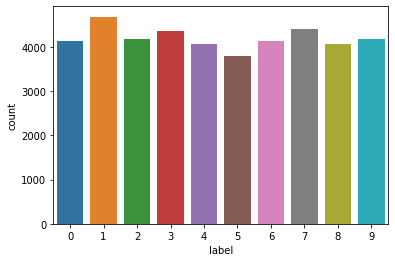

In [ ]:
# Visualize the distribuation of labels
sns.countplot(x=df["label"]);

#### **Model Building and Evaluation**

In [ ]:
# pixels
x = data[:, 1:]

# label
y = data[:, 0]

print(x.shape, y.shape)

(42000, 784) (42000,)


In [ ]:
# put 80 % data for training and rest 20 for testing
# 28*28 pixels = 784
# split = int(0.95*(x.shape[0]))

split = 41000
x_train = x[:split, :]
x_test = x[split:, :]

y_train = y[:split]
y_test = y[split:]

print("Training data shape : ", x_train.shape, y_train.shape)
print("Testing data shape : ", x_test.shape, y_test.shape)

Training data shape :  (41000, 784) (41000,)
Testing data shape :  (1000, 784) (1000,)


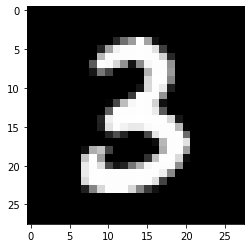

In [ ]:
def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

drawImg(x_test[110])

In [ ]:
Prediction = knn(x_train, y_train, x_test[11])
print(int(Prediction))

1


In [ ]:
len1 = (y_test.shape[0])
corr_pred = 0.0
prediction = []
for i in range (len1):
    pred = knn(x_train, y_train, x_test[i])
    if pred == y_test[i]:
        corr_pred = corr_pred + 1

# accuracy = correct_predictions/total_predictions
accuracy = corr_pred/len1

print(f"Accuracy of model : {accuracy}")

Accuracy of model : 0.972


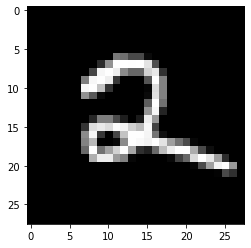

Label : 2.0




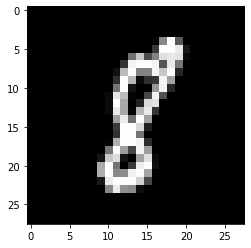

Label : 8.0




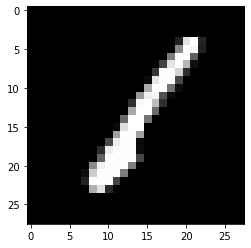

Label : 1.0




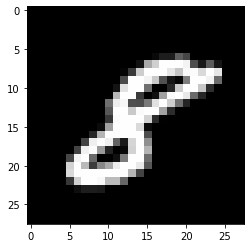

Label : 8.0




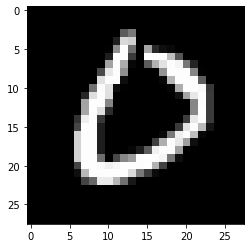

Label : 0.0




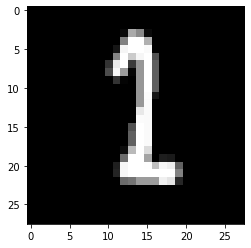

Label : 1.0




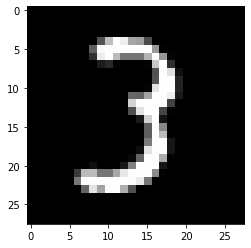

Label : 3.0




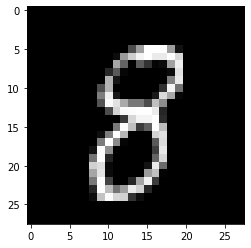

Label : 8.0




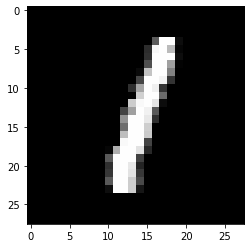

Label : 1.0




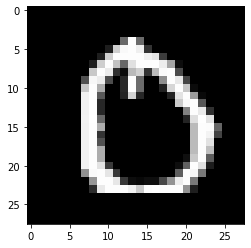

Label : 0.0




In [ ]:
for i in range(10):
    label = knn(x_train, y_train, x_test[i])
    drawImg(x_test[i])
    print(f"Label : {label}\n\n")